In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
os.getcwd()

'C:\\Users\\Lenovo\\Desktop\\PGA01-Mentorship Session'

In [2]:
dataset = pd.read_csv('Churn_Modelling.csv')
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
dataset.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [ ]:
# RowNumber	CustomerId	Surname - these three variables are non-significant 
    # to decide whether customer exited or not. Hence, we are dropping this variables

# Geography And Gender are char variable and need Encoding

In [5]:
dataset['Geography'] = dataset['Geography'].astype('category')
# Label encoder
dataset['Geography'] = dataset['Geography'].cat.codes
# One Hot Encoder
dataset = pd.get_dummies(dataset, columns=['Geography'])

In [6]:
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_0,Geography_1,Geography_2
0,1,15634602,Hargrave,619,Female,42,2,0.00,1,1,1,101348.88,1,1,0,0
1,2,15647311,Hill,608,Female,41,1,83807.86,1,0,1,112542.58,0,0,0,1
2,3,15619304,Onio,502,Female,42,8,159660.80,3,1,0,113931.57,1,1,0,0
3,4,15701354,Boni,699,Female,39,1,0.00,2,0,0,93826.63,0,1,0,0
4,5,15737888,Mitchell,850,Female,43,2,125510.82,1,1,1,79084.10,0,0,0,1


In [8]:
dataset['Gender'] = dataset['Gender'].astype('category')
dataset['Gender'] = dataset['Gender'].cat.codes
dataset = pd.get_dummies(dataset, columns=['Gender'])

In [9]:
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_0,Geography_1,Geography_2,Gender_0,Gender_1
0,1,15634602,Hargrave,619,42,2,0.00,1,1,1,101348.88,1,1,0,0,1,0
1,2,15647311,Hill,608,41,1,83807.86,1,0,1,112542.58,0,0,0,1,1,0
2,3,15619304,Onio,502,42,8,159660.80,3,1,0,113931.57,1,1,0,0,1,0
3,4,15701354,Boni,699,39,1,0.00,2,0,0,93826.63,0,1,0,0,1,0
4,5,15737888,Mitchell,850,43,2,125510.82,1,1,1,79084.10,0,0,0,1,1,0


In [10]:
dataset = dataset.drop(['RowNumber','CustomerId','Surname',
                        'Geography_0','Gender_0'], axis=1)

In [11]:
dataset.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_1,Geography_2,Gender_1
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


In [12]:
x = dataset.drop(['Exited'], axis=1)
y = dataset['Exited']

In [13]:
x.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_1,Geography_2,Gender_1
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0


In [14]:
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

In [15]:
# splitting the data into training and test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,train_size=0.75,
                                                    random_state=101)

In [16]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(7500, 11)
(2500, 11)
(7500,)
(2500,)


# Building Multilayer Perceptron (Deep Neural Network)

In [18]:
import tensorflow as tf
from tensorflow import keras
# API - 
dnn = tf.keras.models.Sequential()

In [22]:
# Add first hidden layer
dnn.add(tf.keras.layers.Dense(units=20, activation = 'relu'))
# Add second hidden layer
dnn.add(tf.keras.layers.Dense(units=20, activation = 'relu'))
# Add third hidden layer
dnn.add(tf.keras.layers.Dense(units=15, activation = 'relu'))
# add output layer
dnn.add(tf.keras.layers.Dense(units=1, activation = 'sigmoid'))

In [23]:
# train deep learning model for classification problems
dnn.compile(optimizer= 'adam', loss = 'binary_crossentropy',metrics=['accuracy'])

In [24]:
# predict 
dnn.fit(x_train, y_train, batch_size=50,epochs=200)

Epoch 1/200
150/150 [==============================] - 1s 2ms/step - loss: 0.5422 - accuracy: 0.7984
Epoch 2/200
150/150 [==============================] - 0s 2ms/step - loss: 0.5033 - accuracy: 0.7984
Epoch 3/200
150/150 [==============================] - 0s 2ms/step - loss: 0.5029 - accuracy: 0.7984
Epoch 4/200
150/150 [==============================] - 0s 2ms/step - loss: 0.5025 - accuracy: 0.7984
Epoch 5/200
150/150 [==============================] - 0s 2ms/step - loss: 0.5029 - accuracy: 0.7984
Epoch 6/200
150/150 [==============================] - 0s 2ms/step - loss: 0.5029 - accuracy: 0.7984
Epoch 7/200
150/150 [==============================] - 0s 3ms/step - loss: 0.5032 - accuracy: 0.7984
Epoch 8/200
150/150 [==============================] - 1s 4ms/step - loss: 0.5029 - accuracy: 0.7984
Epoch 9/200
150/150 [==============================] - 1s 3ms/step - loss: 0.5036 - accuracy: 0.7984
Epoch 10/200
150/150 [==============================] - 0s 3ms/step - loss: 0.5029 - accura

150/150 [==============================] - 0s 3ms/step - loss: 0.5030 - accuracy: 0.7984
Epoch 82/200
150/150 [==============================] - 0s 3ms/step - loss: 0.5029 - accuracy: 0.7984
Epoch 83/200
150/150 [==============================] - 0s 3ms/step - loss: 0.5029 - accuracy: 0.7984
Epoch 84/200
150/150 [==============================] - 0s 3ms/step - loss: 0.5031 - accuracy: 0.7984
Epoch 85/200
150/150 [==============================] - 0s 3ms/step - loss: 0.5029 - accuracy: 0.7984
Epoch 86/200
150/150 [==============================] - 0s 3ms/step - loss: 0.5029 - accuracy: 0.7984
Epoch 87/200
150/150 [==============================] - 0s 3ms/step - loss: 0.5032 - accuracy: 0.7984
Epoch 88/200
150/150 [==============================] - 0s 3ms/step - loss: 0.5027 - accuracy: 0.7984
Epoch 89/200
150/150 [==============================] - 0s 3ms/step - loss: 0.5030 - accuracy: 0.7984
Epoch 90/200
150/150 [==============================] - 0s 3ms/step - loss: 0.5029 - accuracy: 

150/150 [==============================] - 1s 4ms/step - loss: 0.5030 - accuracy: 0.7984
Epoch 161/200
150/150 [==============================] - 0s 3ms/step - loss: 0.5028 - accuracy: 0.7984
Epoch 162/200
150/150 [==============================] - 1s 5ms/step - loss: 0.5027 - accuracy: 0.7984
Epoch 163/200
150/150 [==============================] - 1s 4ms/step - loss: 0.5030 - accuracy: 0.7984
Epoch 164/200
150/150 [==============================] - 1s 4ms/step - loss: 0.5027 - accuracy: 0.7984
Epoch 165/200
150/150 [==============================] - 1s 4ms/step - loss: 0.5029 - accuracy: 0.7984
Epoch 166/200
150/150 [==============================] - 1s 4ms/step - loss: 0.5028 - accuracy: 0.7984
Epoch 167/200
150/150 [==============================] - 1s 4ms/step - loss: 0.5028 - accuracy: 0.7984
Epoch 168/200
150/150 [==============================] - 1s 4ms/step - loss: 0.5032 - accuracy: 0.7984
Epoch 169/200
150/150 [==============================] - 1s 4ms/step - loss: 0.5032 - a

In [26]:
# predict the model with test dataset
y_pred = dnn.predict(x_test)
y_pred = (y_pred>0.5)
y_pred

array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [27]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [28]:
confusion_matrix(y_test, y_pred)

array([[1975,    0],
       [ 525,    0]], dtype=int64)

In [30]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      1.00      0.88      1975
           1       0.00      0.00      0.00       525

    accuracy                           0.79      2500
   macro avg       0.40      0.50      0.44      2500
weighted avg       0.62      0.79      0.70      2500



C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [31]:
print(accuracy_score(y_test, y_pred))

0.79


In [ ]:
# in this model we neither found high bias nor high variance. Hence, my model is absolutly right
# train accuracy - 79.84
# test accuracy - 79
# Hence, we are concluding our model here

In [ ]:
# KPI - Key Performance Indicator - TARGET
1) Business Opportunity (idea or opportunity that an investor/stakeholder/client looks at)
a) increase the revenue for business
b) increase the long term profit
c) reliable on Machine/System - saving cost
e) up selling, cross selling
f) Market basket analysis
g) I get the data from my customer - Sellable - Cross Business Benefit
h) desplacement of HR job
i)

Note - How the KPI is going to look like 3 months down the line / 6 month down the line ?
- predictive analytics - ML - Supervise ML (Regression /Classification /Time Series Forecasting)

2) Solution / Technology :
a) Machine Learning
b) Deep Learning
c) Computer Vision
d) AI - Sensor Fusion (IOT)
e) CNN 
f) Re-inforcement Learning
h) Text to Speech - Voice Agent / Conversational Agent - Google duplex
i) Natural Language Processing 
    - Natural Language Understanding - NLU
j) image recognition/face recognition
k) AI - Emotion intelligence 

3) Value Creation - the product features that end users uses to leverage the value for Money -
a) Better customer experience
b) Optimizing Operational cost
c) improving customer satisfaction score
d) Amazon Pay - geteway
e) Build Trust
f) Safety 
g) Goodwill
i) No bias / more transparancy
j) 

# Image dataset with DNN

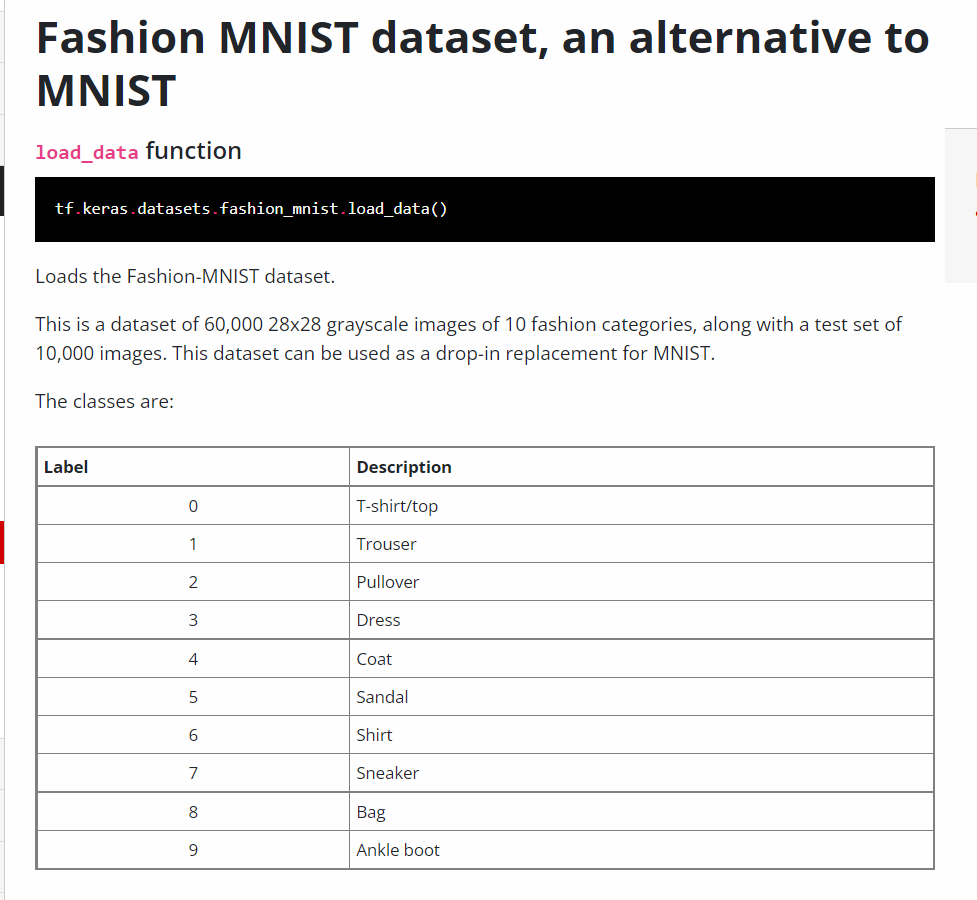

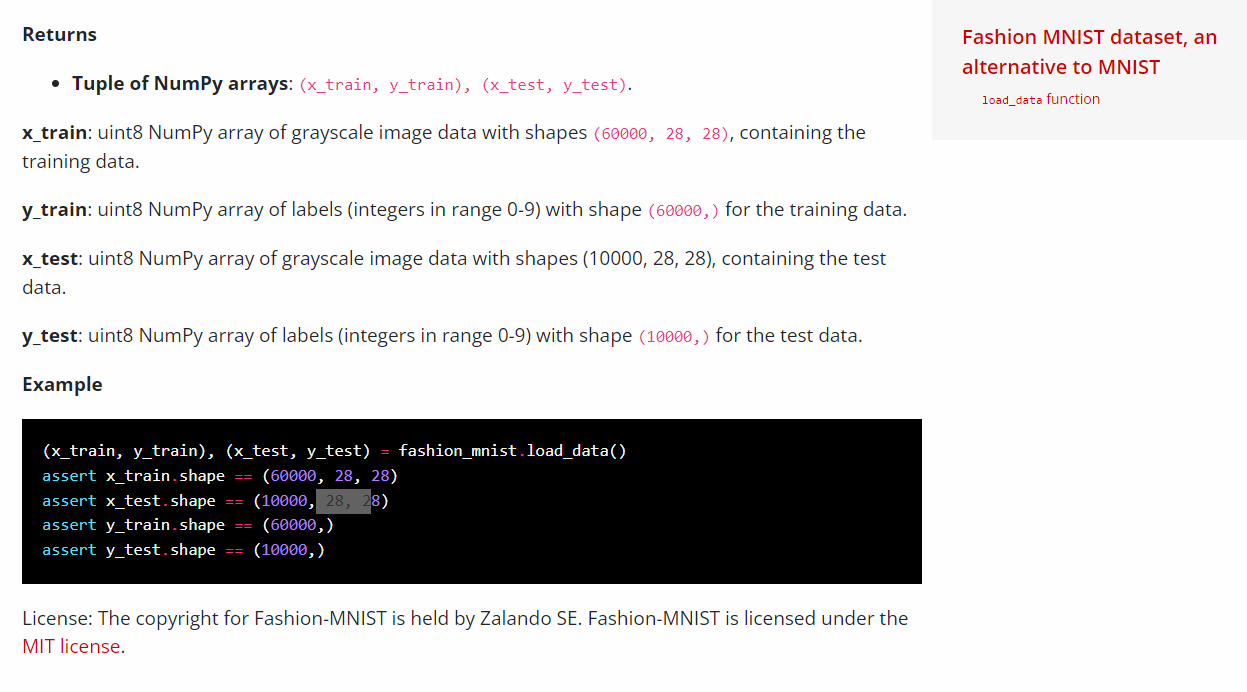

In [32]:
# Fashion MNIST dataset
fashion_mnist = keras.datasets.fashion_mnist

In [33]:
fashion_mnist

<module 'keras.api._v2.keras.datasets.fashion_mnist' from 'C:\\Users\\Lenovo\\anaconda3\\lib\\site-packages\\keras\\api\\_v2\\keras\\datasets\\fashion_mnist\\__init__.py'>

In [34]:
(train_images, train_labels),(test_images, test_labels) = fashion_mnist.load_data()

print(train_images.shape)
print(test_images.shape)
print(train_labels.shape)
print(test_labels.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


Label	Description
0	T-shirt/top
1	Trouser
2	Pullover
3	Dress
4	Coat
5	Sandal
6	Shirt
7	Sneaker
8	Bag
9	Ankle boot

In [35]:
class_names = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

In [36]:
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

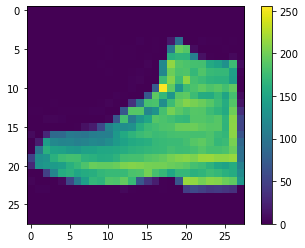

In [43]:
plt.figure()
plt.imshow(train_images[50000])
plt.colorbar()
plt.grid(False)
plt.show()

In [44]:
# Data Pre-processing : min max approach
# most popular on image processing - it's mandatory steps
train_images = train_images / 255.0
test_images = test_images / 255.0

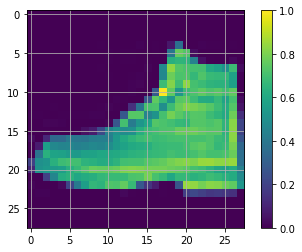

In [45]:
plt.figure()
plt.imshow(train_images[50000])
plt.colorbar()
plt.grid()
plt.show()

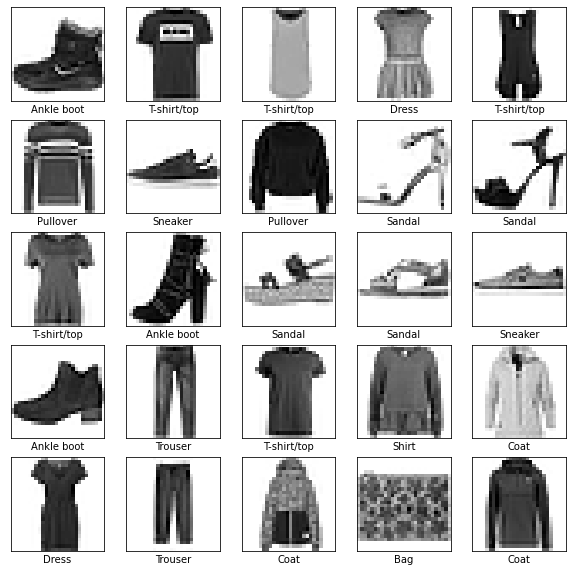

In [47]:
# Lets see few more images
plt.figure(figsize = (10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap = plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [48]:
# Now, we are ready to build multilayer perceptron

tf.random.set_seed(100)
tf.keras.backend.clear_session()

model = None
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128, activation = 'relu'),
    keras.layers.Dense(10)
])

In [49]:
from tensorflow.keras.utils import plot_model
plot_model(model, 'model.png', show_shapes = True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.


# Home Work

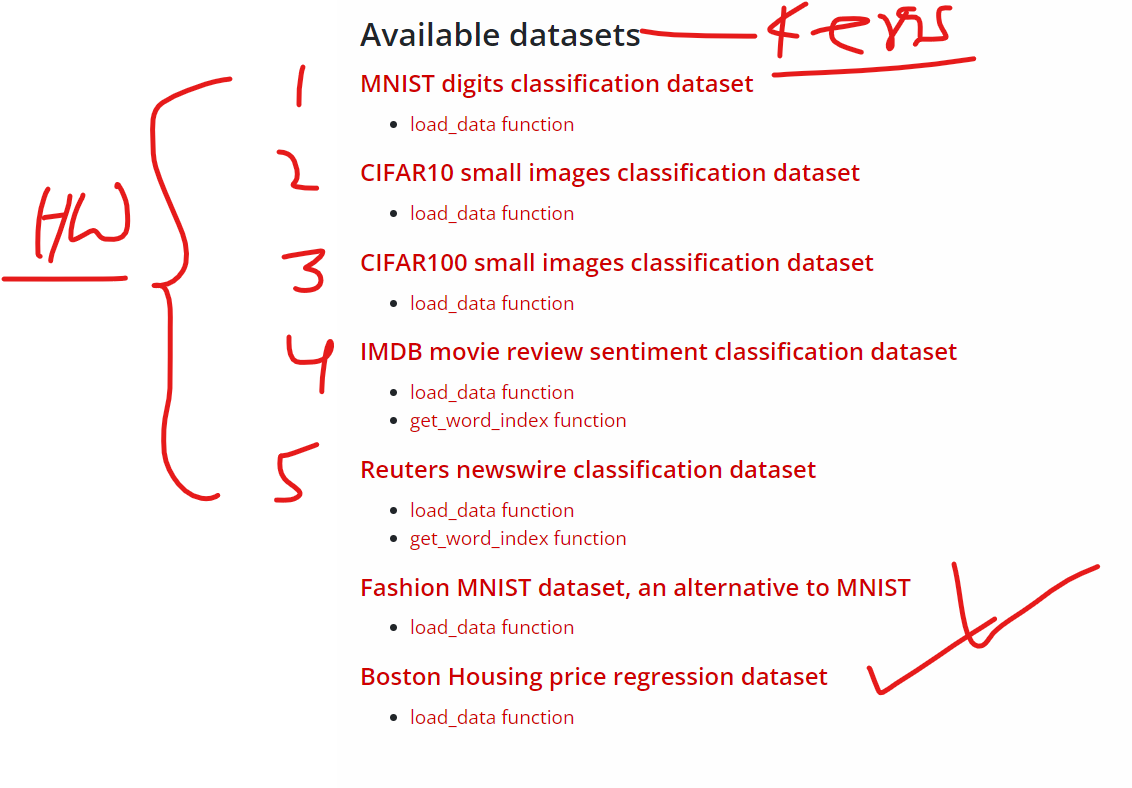